# 🏠 Prédire les prix de logements en Californie – Régression supervisée

Ce projet utilise le dataset California Housing de Scikit-learn pour construire un modèle de régression permettant de prédire la valeur moyenne des logements à partir de plusieurs variables démographiques et géographiques.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: >

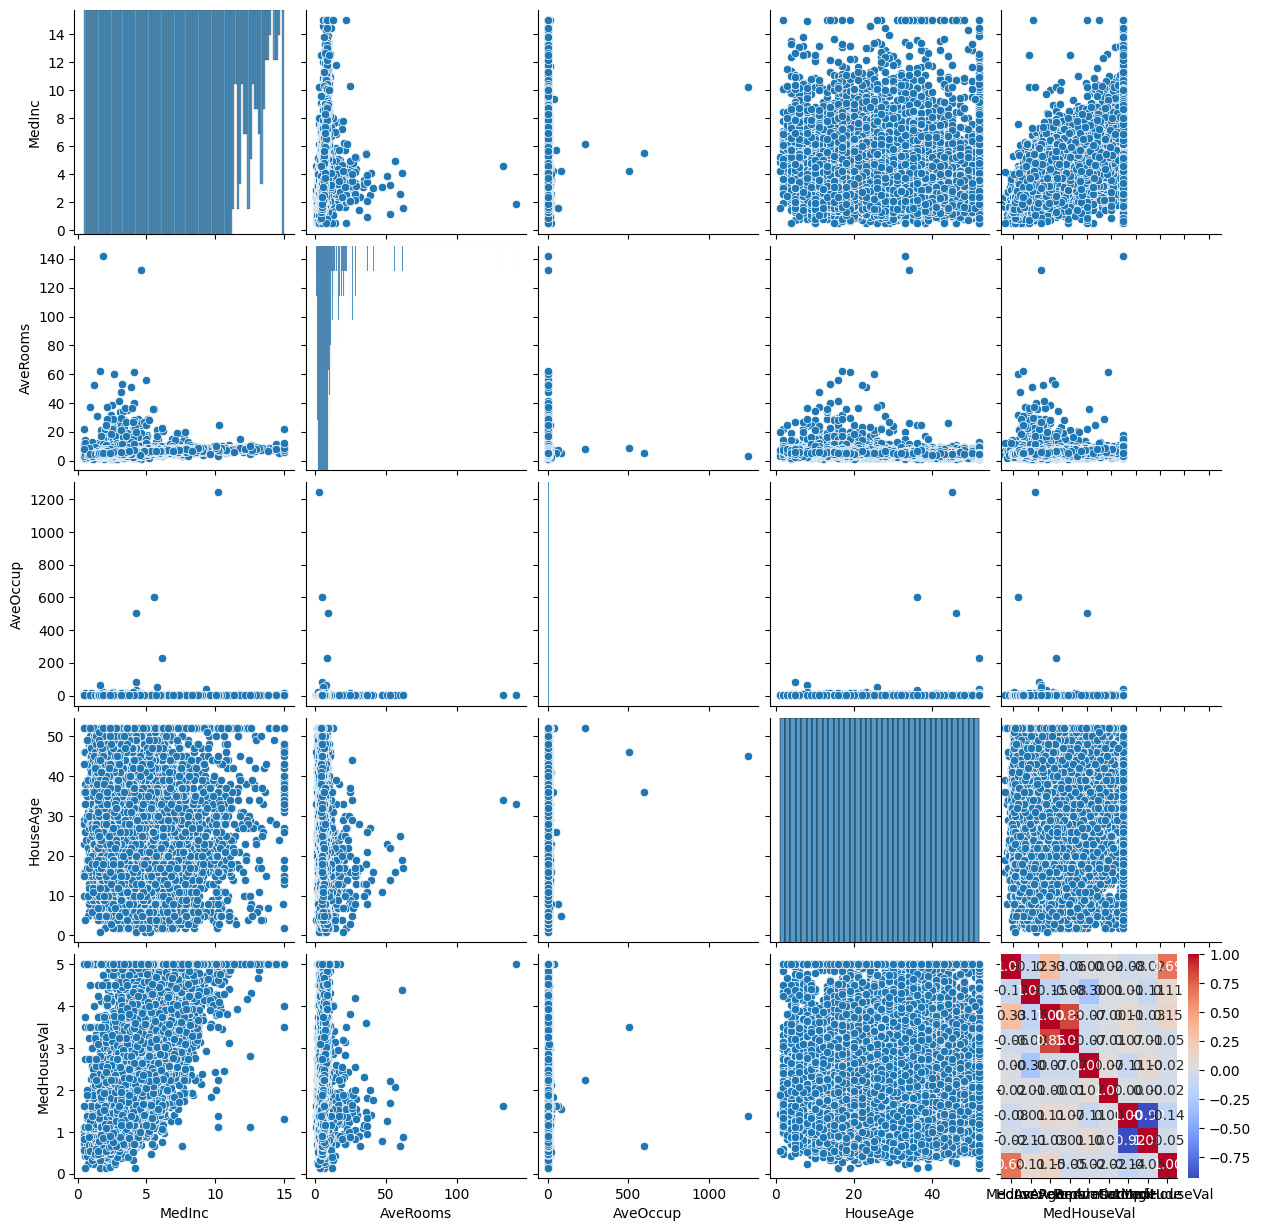

In [3]:
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'MedHouseVal']])
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")


In [4]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("LinearRegression R²:", r2_score(y_test, y_pred_lr))

LinearRegression R²: 0.5757877060324508


In [6]:
pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(pipe_ridge, param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)
print("Best Ridge R²:", r2_score(y_test, grid_ridge.predict(X_test)))

pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])
param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(pipe_lasso, param_grid_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)
print("Best Lasso R²:", r2_score(y_test, grid_lasso.predict(X_test)))


Best Ridge R²: 0.5757879873121599
Best Lasso R²: 0.576856256870568


In [7]:
results = pd.DataFrame({
    "Model": ["Linear", "Best Ridge", "Best Lasso"],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, grid_ridge.predict(X_test)),
        r2_score(y_test, grid_lasso.predict(X_test))
    ]
})
results.sort_values(by="R² Score", ascending=False)


,Model,R² Score
2,Best Lasso,0.576856
1,Best Ridge,0.575788
0,Linear,0.575788


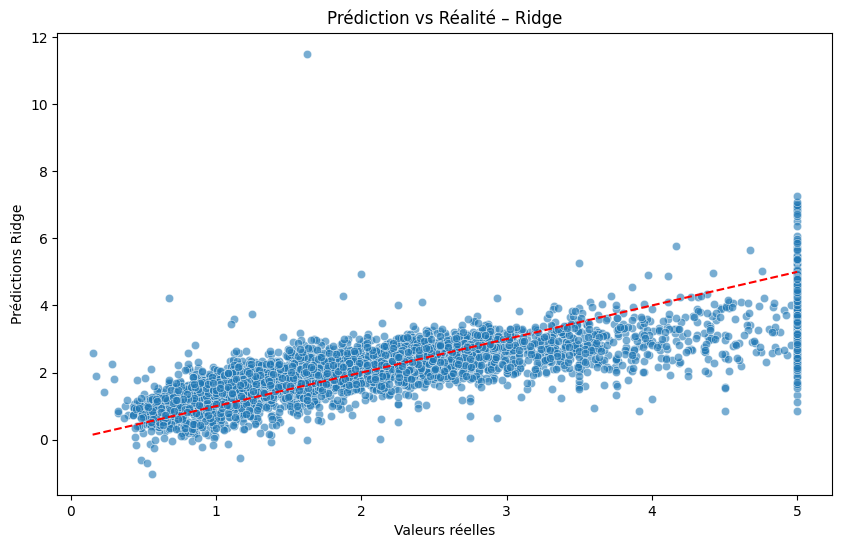

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=grid_ridge.predict(X_test), alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions Ridge")
plt.title("Prédiction vs Réalité – Ridge")
plt.show()


## 🎯 Conclusion

- Le modèle Ridge a obtenu la meilleure performance avec un R² de 0.57
- L’ajout de régularisation a permis d’éviter l’overfitting et de mieux généraliser
- Pour aller plus loin, on pourrait tester des modèles non-linéaires (RandomForest, XGBoost)
